# <center><ins>Business Case: "Aerofit" - Descriptive Statistics & Probability</ins></center>

<img src="https://aerofit.co/wp-content/uploads/2022/01/Aerofit-Website-Banners-1-imresizer.jpg" width=1000 height=350>

**<ins>Dataset Description:</ins>**       
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**<ins>Dataset:</ins>**        
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:
* **Product Purchased:**	KP281, KP481, or KP781
* **Age:**	In years
* **Gender:**	Male/Female
* **Education:**	In years
* **MaritalStatus:**	Single or partnered
* **Usage:**	The average number of times the customer plans to use the treadmill each week.
* **Income:**	Annual income (in $)
* **Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	The average number of miles the customer expects to walk/run each week

**<ins>Product Portfolio:</ins>**

* The KP281 is an entry-level treadmill that sells for $1,500.          

* The KP481 is for mid-level runners that sell for $1,750.   

* The KP781 treadmill is having advanced features that sell for $2,500.

**<ins>Dataset Link:</ins>**       
https://www.kaggle.com/datasets/pradeepshelke/aerofit-treadmill-sales-dataset

# **(1) Defining Problem Statement and Analyzing Basic Metrics**
***
The market research team at **AeroFit** wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each **AeroFit** treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings & make code more representable
import warnings
warnings.filterwarnings("ignore")

# Load aerofit_treadmill.csv dataset into a pandas dataFrame
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Check the shape of the dataset
df.shape

(180, 9)

In [5]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [6]:
# Check all the columns of the dataset
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Check data types of attributes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observations**:
*   **No null values** found in the data
*   Product, Gender & MaritalStatus column has **object datatype** and all other column name has **integer datatype**

### **Convert categorical attributes to 'category'**

In [8]:
# Convert categorical attributes to 'category'
# This is done to optimize the memory usage and speeding up certain operations to deal with categorical data.
df[['Product', 'Gender', 'MaritalStatus']] = df[['Product', 'Gender', 'MaritalStatus']].astype('category')

In [9]:
# Check Data Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### **Display statistical summary**

In [10]:
# Display statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [11]:
# Display statistical summary of categorical columns
df.describe(include = 'category').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [12]:
# Display statistical summary of all the columns
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations:**
* There are **no missing values** in any columns of the data.
* There are **3 unique products** in the dataset.
* **KP281** is the most frequent product.
* **Minimum & Maximum age** of a person is 18 & 50, while the **mean** is 28.79 and **75% of persons** have age less than or equal to 33.
* Most of the people are having 16 years of education i.e. **75% of persons** are having **education <= 16 years**.
* Out of **180 data points** of the dataset, **104's gender is Male** and **rest** are the **female**.
* **Standard deviation** for **Income & Miles is very high**. These variables might have the **outliers** in it.

# **(2) Non-Graphical Analysis: Value counts and unique attributes**
***

In [13]:
# Separate columns into categorical and non-categorical based on data types
categorical_attributes = df.select_dtypes(include=['category']).columns.tolist()
non_categorical_attributes = df.select_dtypes(exclude=['category']).columns.tolist()

In [14]:
# Calculate value counts and unique attributes for categorical attributes
for cat_attr in categorical_attributes:
    value_counts = df[cat_attr].value_counts()
    unique_values = df[cat_attr].unique()

    print(f"Categorical Attribute: {cat_attr}")
    print(".....................................")
    print(f"Number of unique values: {len(unique_values)}")
    print("Unique values:", unique_values)
    print("Value counts:\n", value_counts, "\n")
    #print("\n")

Categorical Attribute: Product
.....................................
Number of unique values: 3
Unique values: ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Value counts:
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Categorical Attribute: Gender
.....................................
Number of unique values: 2
Unique values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Value counts:
 Male      104
Female     76
Name: Gender, dtype: int64 

Categorical Attribute: MaritalStatus
.....................................
Number of unique values: 2
Unique values: ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Value counts:
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 



**Observations:**
* **Product:** There are **three unique products**: **'KP281'**, **'KP481'**, and **'KP781'**. The distribution of products among customers is as follows:
  - **KP281**: 80 customers
  - **KP481**: 60 customers
  - **KP781**: 40 customers
* **Gender:** There are **two unique genders**: **'Male'** and **'Female'**. The distribution of genders among customers is as follows:
  - **Male**: 104 customers
  - **Female**: 76 customers
* **MaritalStatus:** There are **two unique marital statuses**: **'Single'** and **'Partnered'**. The distribution of marital statuses among customers is as follows:
  - **Partnered**: 107 customers
  - **Single**: 73 customers

In [15]:
# Calculate unique attributes for non-categorical attributes
for non_cat_attr in non_categorical_attributes:
    unique_values = df[non_cat_attr].unique()

    print(f"Non-Categorical Attribute: {non_cat_attr}")
    print(".....................................")
    print(f"Number of unique values: {len(unique_values)}")
    print("Unique values:", unique_values, "\n")

Non-Categorical Attribute: Age
.....................................
Number of unique values: 32
Unique values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 

Non-Categorical Attribute: Education
.....................................
Number of unique values: 8
Unique values: [14 15 12 13 16 18 20 21] 

Non-Categorical Attribute: Usage
.....................................
Number of unique values: 6
Unique values: [3 2 4 5 6 7] 

Non-Categorical Attribute: Fitness
.....................................
Number of unique values: 5
Unique values: [4 3 2 1 5] 

Non-Categorical Attribute: Income
.....................................
Number of unique values: 62
Unique values: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516

**Observations:**   
* **Age**: There are **32 unique ages** in the dataset with the **ages** of the customers **range from 18 to 50**. The ages appear to be **discrete values**.  
* **Education**: There are **8 unique education levels** in the dataset. The education levels appear to be **categorical values** representing **different levels of education**.
* **Usage**: There are **6 unique usage levels** in the dataset. The usage levels represent **how often the customers use the treadmill**.
* **Fitness**: There are **5 unique fitness levels** in the dataset.The fitness levels represent the **fitness level of the customers**.
* **Income**: There are **62 unique income values** in the dataset. The income values **vary widely**, ranging from lower values to higher values.
* **Miles**: There are **37 unique values** representing the **miles run by customers**. The miles values represent the **distance run by customers on the treadmill**.

# **(3) Visual Analysis: Understanding the distribution of the data**
***



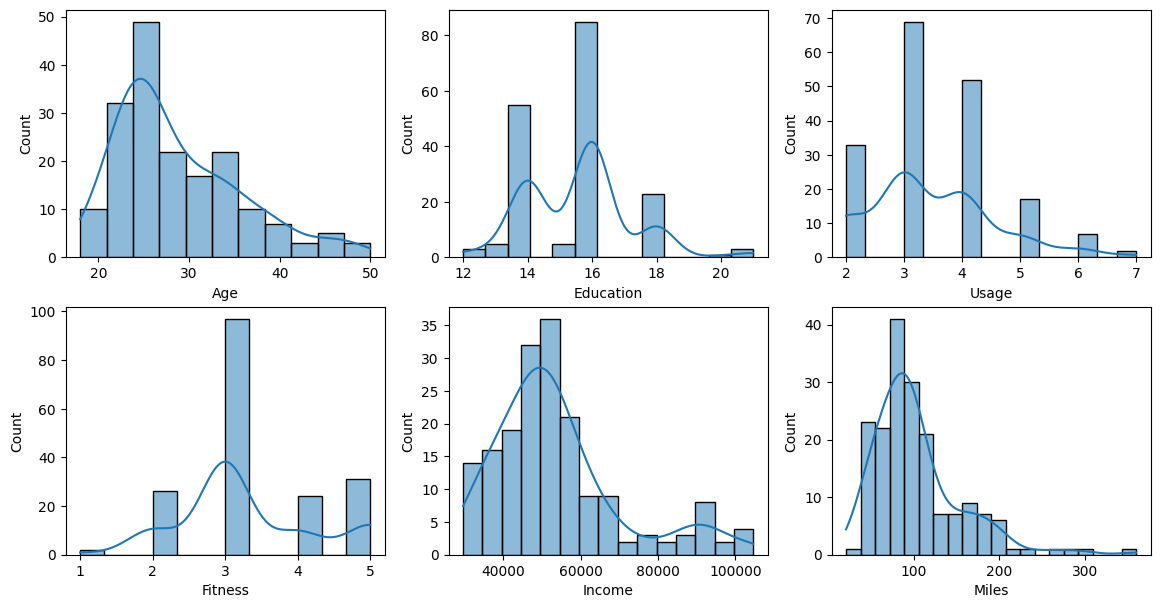

In [16]:
# Understanding the distribution of the data for the quantitative attributes
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 5))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[0,2])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Income", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[1,2])
plt.show()

**Observations:**
* **Age Distribution**: The age distribution is **skewed to the right**, indicating that there are **more younger customers** in the dataset.** Most customers** are in their **mid-20s to mid-30s**, with a **smaller number of customers** in their **40s and 50s**.
* **Education Distribution**: The education distribution appears to be somewhat uniform, with **spikes at certain education levels**. The **majority** of customers seem to have **education levels around 14 and 15**.
* **Usage Distribution**: The usage distribution shows that **most customers** use the **treadmill** for **around 3 to 4 times a week**. There are **fewer customers** who use the **treadmill more frequently**.
* **Fitness Distribution**: The fitness distribution seems to be **skewed to the left**, indicating that a **larger number of customers** have **higher fitness levels**, around 4 and 5.
* **Income Distribution**: The income distribution is **right-skewed**, suggesting that there are **more customers with lower incomes** and there are **fewer customers with higher incomes**.
* **Miles Distribution**: The miles distribution is also **right-skewed**, indicating that there are **more customers who run shorter distances** and **fewer customers run longer distances**.

# **(4) Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**
***

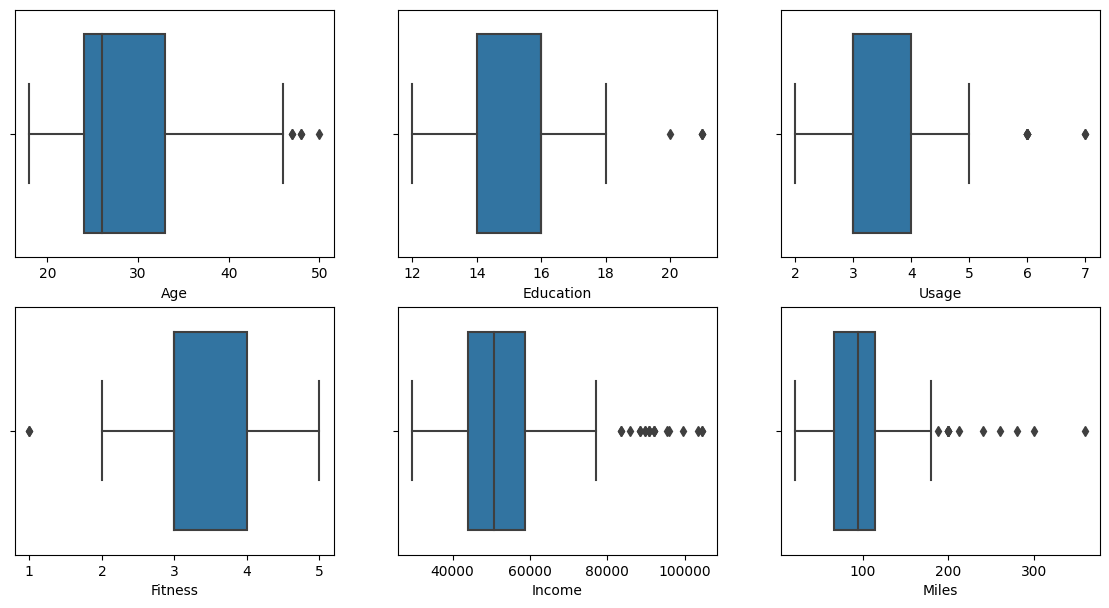

In [17]:
# Displaying outliers of all the columns as an overview
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[0,2])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[1,2])
plt.show()

### **Detecting Outliers of "Age" column**

To find **Outliers**, we need to use **"Box Plot"** but prior to that we need to find the below 5 details:

* **25th percentile** / **Q1**
* **50th percentile** / **Q2 (Median)**
* **75th percentile** / **Q3**
* **IQR range b/w 25th percentile and 75th percentile**
* **Lower_bound**  
* **Upper_bound**

In [18]:
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [19]:
p_25 = np.percentile(df["Age"], 25)       #25th percentile or Q1
p_50 = np.percentile(df["Age"], 50)       #50th percentile or Q2 (Median)
p_75 = np.percentile(df["Age"], 75)       #75th percentile or Q3
print("25th percentile: ", p_25, "\n50th percentile: ", p_50, "\n75th percentile: ", p_75)

iqr = p_75 - p_25       # IQR range b/w 25th percentile and 75th percentile
print("\nIQR: ", iqr)

lower = max(p_25 - 1.5*iqr, 0)        # Calculating min (i.e. lower) points: lower_bound = max(0, 25_percentile - 1.5*IQR)
upper = p_75 + 1.5*iqr        # Calculating max (i.e. upper) points: upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
print("\nLower Bound: ", lower, "\nUpper Bound: ", upper)

25th percentile:  24.0 
50th percentile:  26.0 
75th percentile:  33.0

IQR:  9.0

Lower Bound:  10.5 
Upper Bound:  46.5


<Axes: xlabel='Age'>

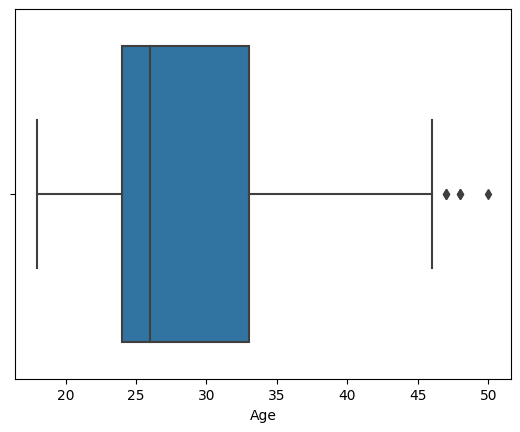

In [20]:
sns.boxplot(data = df, x = "Age")

**Observations:**
* We can see that there are **5 outliers** data points.
* **Any values > 46.5 (upper bound)** are **Outliers** in **"Age"** column

In [21]:
# Checking the % of data which is above the upper_bound (i.e. outliers)
age_outlier = df[df["Age"] > upper]
len(age_outlier)

5

In [22]:
# (5 / 180)*100
# (len(age_outlier)/len(df))*100
(len(df[df["Age"] > upper])/len(df))*100

2.7777777777777777

**Obersations:**
* **2.77%** values of **"Age"** column are **outliers** but we **do not** wish to drop these values as it may be required to draw some valuable insights and it may be useful for **customer profiling**.

<Axes: xlabel='Age', ylabel='Count'>

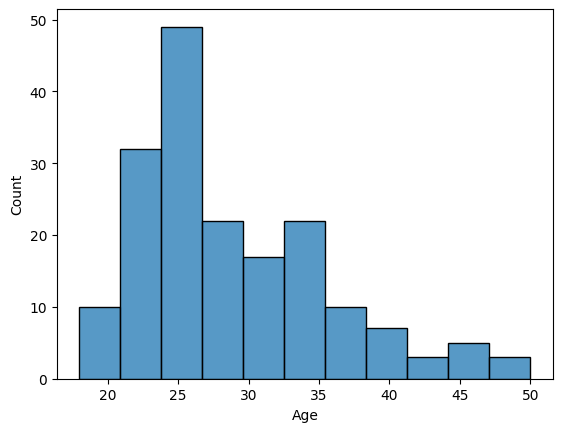

In [23]:
# Data visualization (Histogram Plot) for Distribution of the data points
sns.histplot(df["Age"])

### **Detecting Outliers of "Income" column**

In [24]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [25]:
p_25 = np.percentile(df["Income"], 25)       #25th percentile or Q1
p_50 = np.percentile(df["Income"], 50)       #50th percentile or Q2 (Median)
p_75 = np.percentile(df["Income"], 75)       #75th percentile or Q3
print("25th percentile: ", p_25, "\n50th percentile: ", p_50, "\n75th percentile: ", p_75)

iqr = p_75 - p_25       # IQR range b/w 25th percentile and 75th percentile
print("\nIQR: ", iqr)

lower = max(p_25 - 1.5*iqr, 0)        # Calculating min (i.e. lower) points: lower_bound = max(0, 25_percentile - 1.5*IQR)
upper = p_75 + 1.5*iqr        # Calculating max (i.e. upper) points: upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
print("\nLower Bound: ", lower, "\nUpper Bound: ", upper)

25th percentile:  44058.75 
50th percentile:  50596.5 
75th percentile:  58668.0

IQR:  14609.25

Lower Bound:  22144.875 
Upper Bound:  80581.875


<Axes: xlabel='Income'>

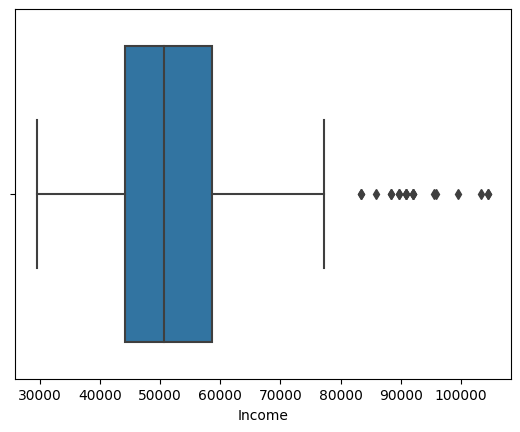

In [26]:
sns.boxplot(data = df, x = "Income")

**Observations:**
* We can see that there are **19 outliers** data points.
* **Any values > 80581.875 (upper bound)** are **Outliers** in **"Income"** column

In [27]:
# Checking the % of data which is above the upper_bound (i.e. outliers)
age_outlier = df[df["Income"] > upper]
len(age_outlier)

19

In [28]:
# (5 / 180)*100
# (len(age_outlier)/len(df))*100
(len(df[df["Income"] > upper])/len(df))*100

10.555555555555555

**Obersations:**
* **10.55%** values of **"Income"** column are **outliers** but we **do not** wish to drop these values as it may be required to draw some valuable insights and it may be useful for **customer profiling**.

### **Detecting Outliers of "Miles" column**

In [29]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [30]:
p_25 = np.percentile(df["Miles"], 25)       #25th percentile or Q1
p_50 = np.percentile(df["Miles"], 50)       #50th percentile or Q2 (Median)
p_75 = np.percentile(df["Miles"], 75)       #75th percentile or Q3
print("25th percentile: ", p_25, "\n50th percentile: ", p_50, "\n75th percentile: ", p_75)

iqr = p_75 - p_25       # IQR range b/w 25th percentile and 75th percentile
print("\nIQR: ", iqr)

lower = max(p_25 - 1.5*iqr, 0)        # Calculating min (i.e. lower) points: lower_bound = max(0, 25_percentile - 1.5*IQR)
upper = p_75 + 1.5*iqr        # Calculating max (i.e. upper) points: upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
print("\nLower Bound: ", lower, "\nUpper Bound: ", upper)

25th percentile:  66.0 
50th percentile:  94.0 
75th percentile:  114.75

IQR:  48.75

Lower Bound:  0 
Upper Bound:  187.875


<Axes: xlabel='Miles'>

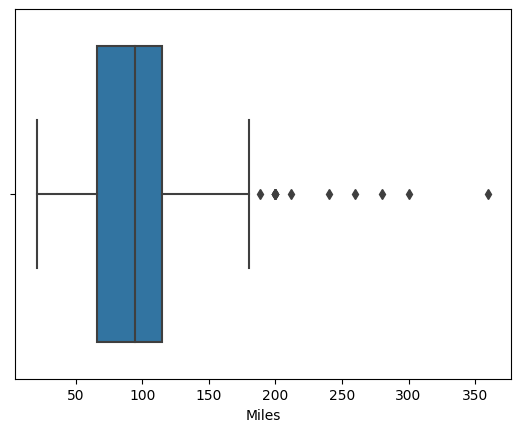

In [31]:
sns.boxplot(data = df, x = "Miles")

**Observations:**
* We can see that there are **13 outliers** data points.
* **Any values > 187.875 (upper bound)** are **Outliers** in **"Miles"** column

In [32]:
# Checking the % of data which is above the upper_bound (i.e. outliers)
age_outlier = df[df["Miles"] > upper]
len(age_outlier)

13

In [33]:
# (5 / 180)*100
# (len(age_outlier)/len(df))*100
(len(df[df["Miles"] > upper])/len(df))*100

7.222222222222221

**Obersations:**
* **7.22%** values of **"Miles"** column are **outliers** but we **do not** wish to drop these values as it may be required to draw some valuable insights and it may be useful for **customer profiling**.

# **(5) Check if features like MaritalStatus, Age have any effect on the product purchased**
***

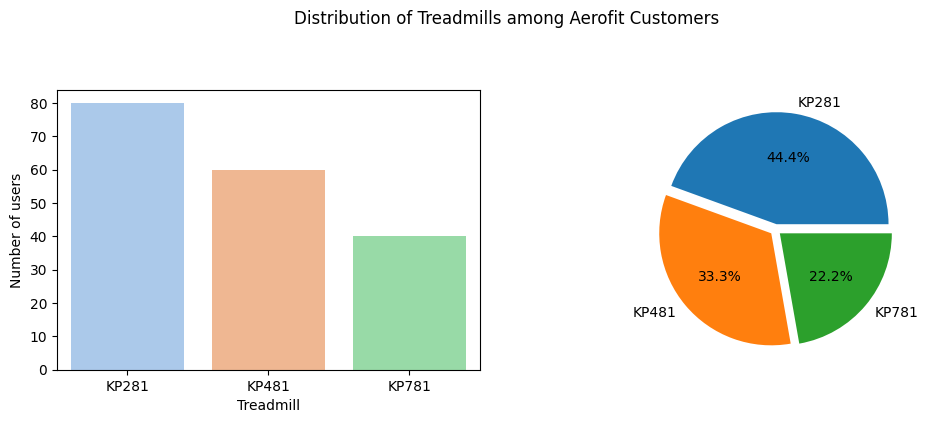

In [34]:
# Distribution of Treadmills among Aerofit dataset
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data = df, x = df["Product"], palette = "pastel")
plt.xlabel("Treadmill")
plt.ylabel("Number of users")
plt.subplot(2, 2, 2)
plt.pie(df["Product"].value_counts(), labels = df["Product"].unique(), explode = (0.05, 0.05, 0.05), autopct='%1.1f%%')
plt.suptitle("Distribution of Treadmills among Aerofit Customers")
plt.show()

**Observations:**
* Among the users, **44.44%** prefer using the **KP281 treadmill**, while **33.33%** opt for the **KP481 treadmill**, and only **22.22%** of users favor the **KP781 treadmill**.
* **KP281**, being an **entry-level** and **more affordable treadmill** compared to the others, is the **preferred choise** among the majority of customers.
* **33.33% of customers** favor the **KP481 treadmill**, draw by its ideal fit for **mid-level runners** and its excellent **value-for-money** offering.
* **KP781 treadmill**, being **more advanced and costlier** than the other two options, is chosen by only **22.2% of customers**.

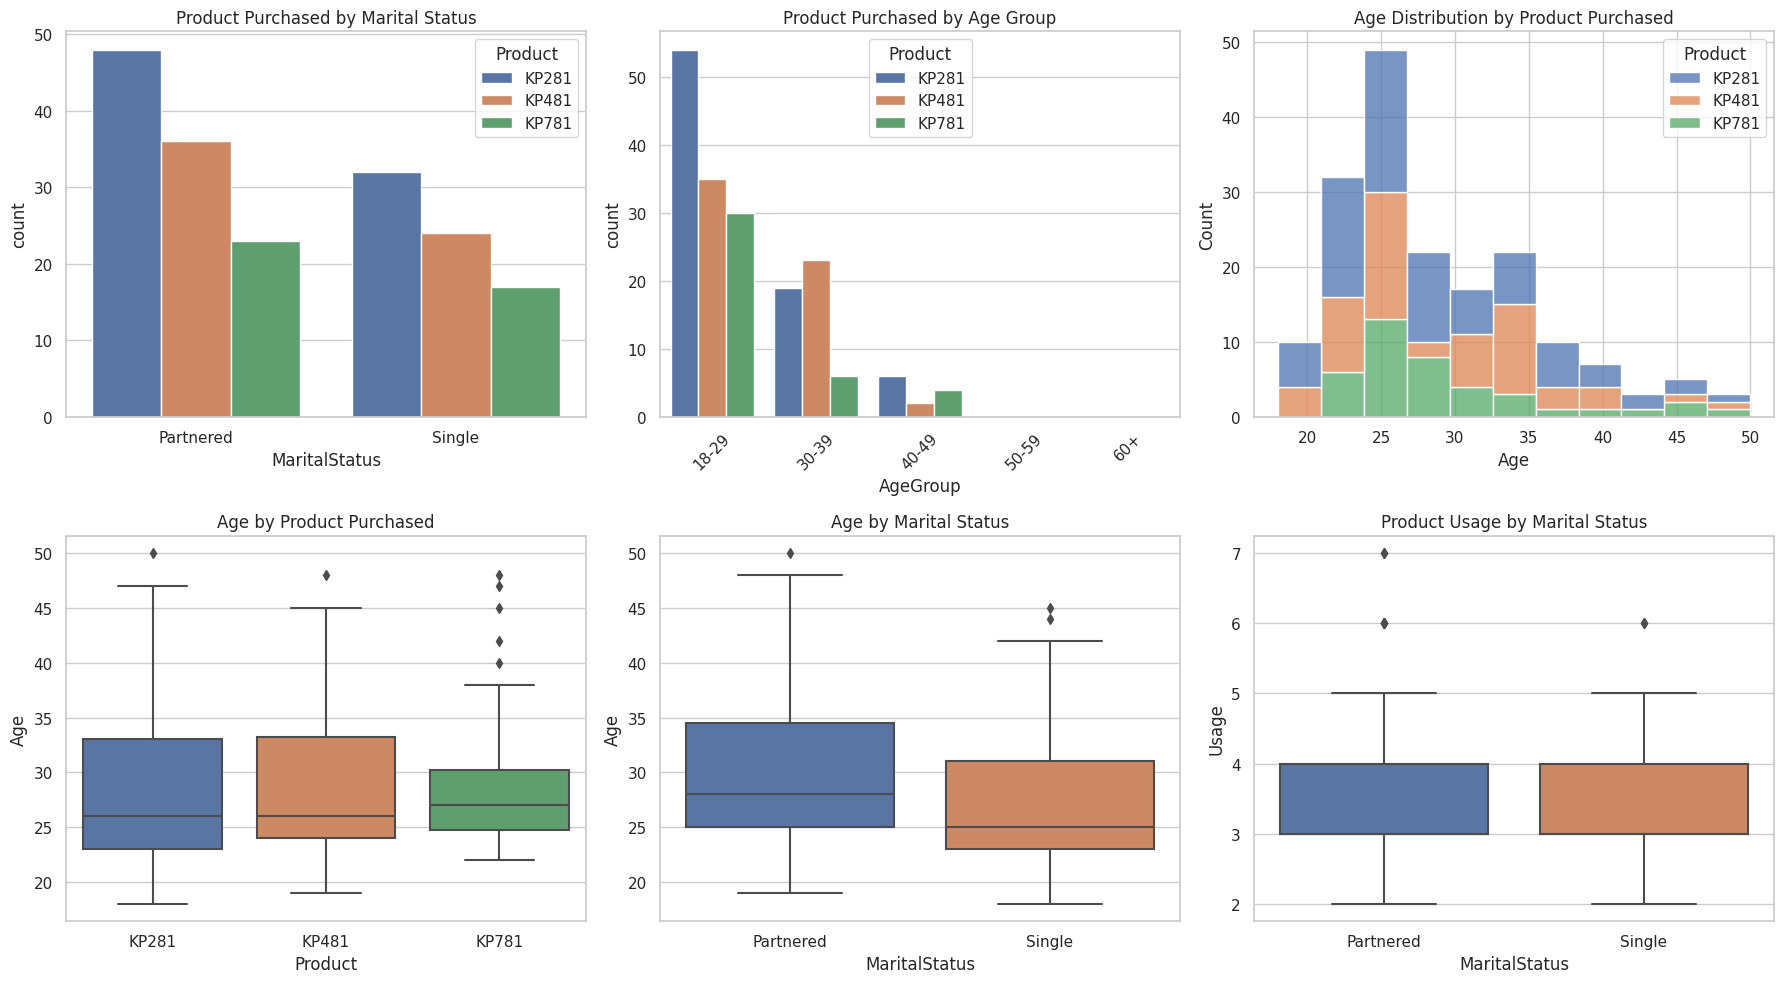

In [46]:
# Set style for plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(top=1.2)

# Countplot: Product Purchased by Marital Status
sns.countplot(data=df, x="MaritalStatus", hue="Product", ax=axes[0, 0])
axes[0, 0].set_title("Product Purchased by Marital Status")

# Countplot: Product Purchased by Age Group
sns.countplot(data=df, x="AgeGroup", hue="Product", ax=axes[0, 1])
axes[0, 1].set_title("Product Purchased by Age Group")
axes[0, 1].tick_params(axis='x', rotation=45)

# Histogram: Age Distribution by Product Purchased
sns.histplot(data=df, x="Age", hue="Product", multiple="stack", ax=axes[0, 2])
axes[0, 2].set_title("Age Distribution by Product Purchased")

# Boxplot: Age by Product Purchased
sns.boxplot(data=df, x="Product", y="Age", ax=axes[1, 0])
axes[1, 0].set_title("Age by Product Purchased")

# Boxplot: Age by Marital Status
sns.boxplot(data=df, x="MaritalStatus", y="Age", ax=axes[1, 1])
axes[1, 1].set_title("Age by Marital Status")

# Boxplot: Product Usage by Marital Status
sns.boxplot(data=df, x="MaritalStatus", y="Usage", ax=axes[1, 2])
axes[1, 2].set_title("Product Usage by Marital Status")

plt.tight_layout()
plt.show()

**Observation:**
* **Countplot: Product Purchased by Marital Status** - This countplot shows how the **products** are **distributed** among **different marital statuses (Partnered and Single)** with a clear **comparison of product distribution** within each marital status category.
* **Countplot: Product Purchased by Age Group** - This countplot displays how the **products** are **distributed** among **different age groups**. The **x-axis** is labeled with **age group categories**, and each age group is further divided by **product colors**. The **x-axis labels** are rotated for better readability.

* **Histogram: Age Distribution by Product Purchased** - This histogram presents the **distribution of ages based on product purchased**. The histogram is **stacked** to show the **distribution of ages within each product category**.

* **Boxplot: Age by Product Purchased** - This boxplot shows the **distribution of ages for each product purchased**. It provides a visual representation of the **age distribution for each product**.
* **Boxplot: Age by Marital Status** - This boxplot displays the **distribution of ages based on marital status**. It allows a **comparison of age distributions** between the **Partnered and Single marital status groups**.
* **Boxplot: Product Usage by Marital Status** - This boxplot illustrates the **distribution of product usage based on marital status**. It helps to understand the **differences in product usage** between **Partnered and Single customers**.

# **(6) Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table**
***

In [48]:
# Calculate the marginal probabilities using pandas.crosstab
marginal_table = pd.crosstab(index=df["Product"], columns="Count", normalize=True) * 100

# Rename the columns and reset index for better presentation
marginal_table.rename(columns={"Count": "Marginal Probability (%)"}, inplace=True)
marginal_table.reset_index(inplace=True)

# Display the table
print(marginal_table)

col_0 Product  Marginal Probability (%)
0       KP281                 44.444444
1       KP481                 33.333333
2       KP781                 22.222222


**Observations:**
* **44.44%** of customers purchased the **'KP281' treadmill**.
* **33.33%** of customers purchased the **'KP481' treadmill**.
* **22.22%** of customers purchased the **'KP781' treadmill**.

# **(7) Check correlation among different factors using heat maps or pair plots.**
***

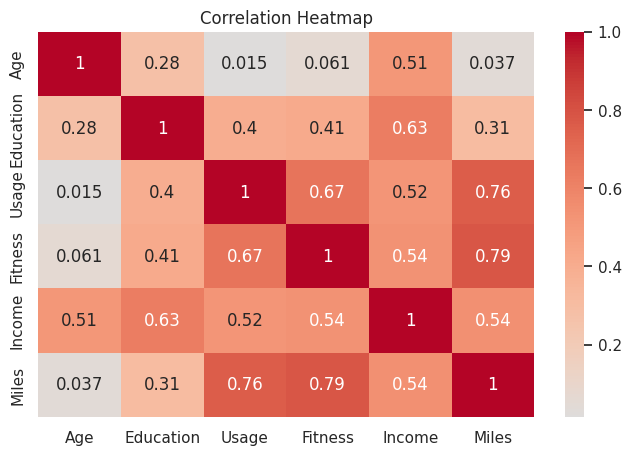

In [37]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

**Observations:**
* Some attributes have **strong positive correlations**, indicated by **darker colors**, suggesting a **positive linear relationship** between them.
* For example, there seems to be a **positive correlation** between **'Fitness' and 'Usage'**, as well as between **'Fitness' and 'Miles'**.
* On the other hand, there are attributes with **negative correlations**, indicated by **cooler colors**, implying an **inverse relationship** between them.
* The **correlations** between **'Income' and the other attributes** appear to be **relatively weak**, showing that there may not be **strong linear relationships**.

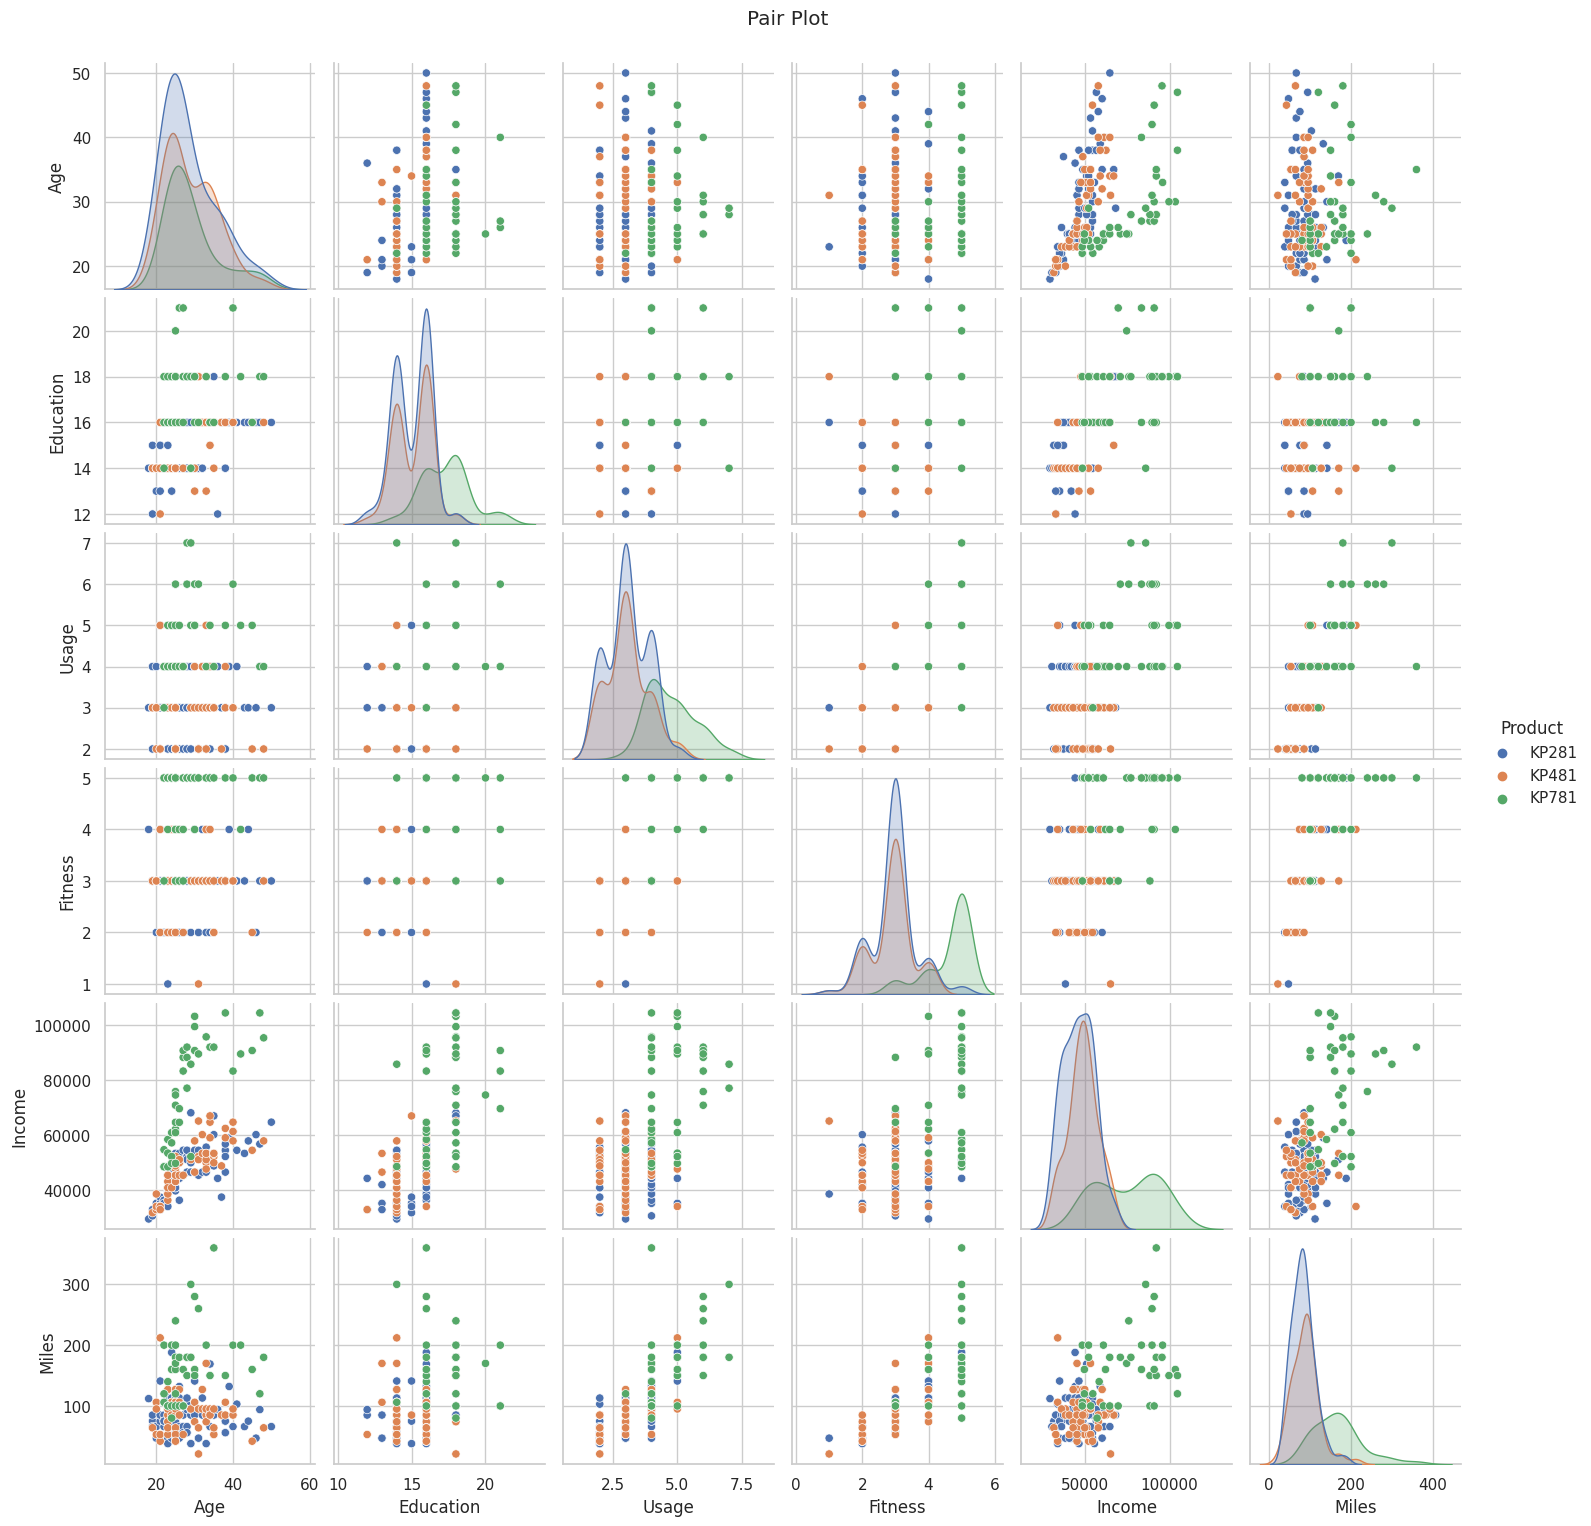

In [38]:
# Create a pair plot
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

**Observations:**
* The **scatter plots** show how the **relationships** between different attributes vary for each product.
* For example, you can observe how the **distribution of 'Age', 'Fitness', 'Usage', and 'Income' differs for different products**.
* Some attributes appear to have **clustering patterns**, indicating **potential relationships** between them.
* The **KDE plots** on the diagonal give **insights** into the **distribution of individual attributes**.

# **(8) What is the probability of a male customer buying a KP781 treadmill?**
***

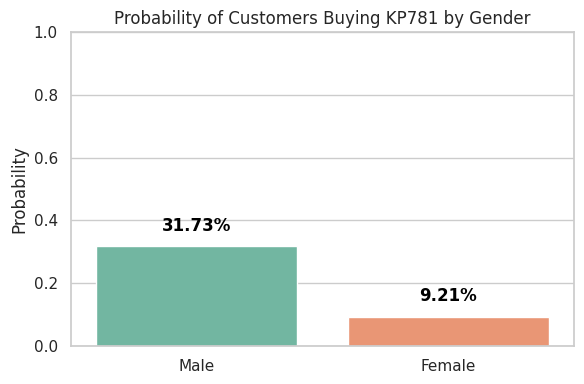

In [55]:
# Calculate the probabilities
total_male_customers = len(df[df["Gender"] == "Male"])
total_female_customers = len(df[df["Gender"] == "Female"])
male_buying_KP781 = len(df[(df["Gender"] == "Male") & (df["Product"] == "KP781")])
female_buying_KP781 = len(df[(df["Gender"] == "Female") & (df["Product"] == "KP781")])
probability_male = male_buying_KP781 / total_male_customers
probability_female = female_buying_KP781 / total_female_customers

# Create a grouped bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=["Male", "Female"], y=[probability_male, probability_female], palette="Set2")
plt.title("Probability of Customers Buying KP781 by Gender")
plt.ylabel("Probability")
plt.ylim(0, 1)  # Set y-axis limit to 0-1
plt.tight_layout()

# Display the probability values on the bars
plt.text(0, probability_male + 0.05, f"{probability_male:.2%}", ha="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, probability_female + 0.05, f"{probability_female:.2%}", ha="center", color="black", fontsize=12, fontweight="bold")

plt.show()

**Observation:**
* Probability of a **male customer** buying **KP781**: **31.73%**
* While the robability of a **female customer** buying **KP781**: **9.21%**

# **(9) Customer Profiling - Categorization of users**
***

In [43]:
# Define age and fitness level segments
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ["18-29", "30-39", "40-49", "50-59", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

fitness_bins = [0, 2, 4, 6]
fitness_labels = ["Low", "Medium", "High"]
df["FitnessLevel"] = pd.cut(df["Fitness"], bins=fitness_bins, labels=fitness_labels)

# Create a pivot table to show the distribution
segment_pivot = pd.pivot_table(df, index="AgeGroup", columns="FitnessLevel", values="Product", aggfunc="count", fill_value=0)

# Display the pivot table
print(segment_pivot)

FitnessLevel  Low  Medium  High
AgeGroup                       
18-29          18      80    21
30-39           8      33     7
40-49           2       7     3
50-59           0       0     0
60+             0       0     0


**Observations:**
* Most of the customers are in the **"Medium" fitness level** across **all age groups**.
* Among the **"18-29" age group**, the **highest number of customers** are in the **"Medium"** fitness level, followed by the **"High"** fitness level.
* The **customer count decreases** in the **"30-39" age group**, with the majority still in the **"Medium"** fitness level.
* The **"40-49" age group** has **fewer customers**, and the majority of them are in the **"Medium"** fitness level.
* There are **NO customers** in the **"50-59" and "60+" age groups**, indicating that these age groups might **not be present** in the dataset or they have **zero counts** in the specified **fitness levels**.

# **(10) Probability- marginal, conditional probability**
***

In [45]:
# Calculate Marginal Probability of Product Purchase
marginal_prob_product = df["Product"].value_counts() / len(df)

# Calculate Conditional Probability: P(Purchase KP781 | Gender is Male)
total_males = len(df[df["Gender"] == "Male"])
males_buying_KP781 = len(df[(df["Gender"] == "Male") & (df["Product"] == "KP781")])
conditional_prob = males_buying_KP781 / total_males

# Display results
print("Marginal Probability of Product Purchase:")
print(marginal_prob_product)
print("\nConditional Probability: P(Purchase KP781 | Gender is Male):")
print(conditional_prob)

Marginal Probability of Product Purchase:
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Conditional Probability: P(Purchase KP781 | Gender is Male):
0.3173076923076923


**Observations:**

**Marginal Probability of Product Purchase :-**

* This marginal probability refers to the **probability** of a random customer **purchasing** each specific product, regardless of any other attribute.
* **KP281** has a marginal probability of approximately **0.444 (44.44%)**.
* **KP481** has a marginal probability of approximately **0.333 (33.33%)**.
* **KP781** has a marginal probability of approximately **0.222 (22.22%)**.

**Conditional Probability: P(Purchase KP781 | Gender is Male) :-**

* This conditional probability calculates the **likelihood** of a customer **purchasing** the **KP781 treadmill** given that the customer's gender is** Male**.
* The **calculated probability** is approximately **0.3173 (31.73%)**.
* This means that among the **Male** customers, about **31.73%** of them purchased the **KP781 treadmill**.

# **(11) Final Recommendations**
***

**"Aerofit"** is a **leading fitness equipment** brand that specializes in providing **high-quality treadmills** for individuals seeking to improve their health and fitness levels. With a commitment to **innovation** and **customer satisfaction**, **Aerofit** offers a range of **treadmill models** designed to cater to varying fitness needs and preferences.

After having a complete analysis of the **Aerofit** dataset, some of the key **actionable recommendations** are shown below:

* **Product Diversification and Marketing**:    
The **Aerofit** should continue its focus on diversifying its product range to **cater to different customer segments**. While **KP281** is the most popular product, there is an **opportunity to strengthen** the appeal of **KP481** and **KP781** through targeted **marketing campaigns**. Highlight unique features and benefits of each product to attract a **broader audience**.

* **Customer Profiling for Targeted Marketing**:    
Utilize the **customer profiling** insights gained from analyzing **age groups and fitness levels**. Develop tailored marketing strategies that resonate with each age group's fitness preferences. For instance, **engage younger customers** with innovative features and the convenience of **KP281**, and highlight the **advanced features of KP781** to attract more mature fitness enthusiasts.

* **Gender-Based Marketing Strategies**:    
Given the observed conditional probability for **KP781** among **Male** customers, consider tailoring **marketing efforts to appeal to this demographic**. Emphasize features that align with **Male** customers' preferences and fitness goals, such as performance enhancements and advanced training programs.

* **Income-Based Segmentation**:   
Investigate the **relationship between income and product preferences further**. If higher-income customers show a preference for specific products, develop **premium offerings** that align with their fitness aspirations and disposable income. Offer flexible financing options to make these products more accessible.

* **Age-Specific Features and Promotions**:    
Recognize the different fitness goals and needs across age groups. Develop **age-specific features or packages**, such as special training programs for the younger demographic and joint-friendly features for older customers. Promotions tailored to specific age groups can further **incentivize purchases**.  

* **Customer Engagement and Loyalty Programs**:    
Establish **customer engagement initiatives**, such as fitness challenges or virtual training sessions, to foster a sense of **community and commitment** among **Aerofit customers**. Implement **loyalty programs** that reward repeat purchases and referrals, incentivizing customers to stay loyal to the brand.

* **Continuous Data Analysis**:    
Maintain a culture of data analysis to **uncover evolving trends and preferences** in customer behavior. Regularly monitor the effectiveness of **marketing strategies and product offerings** through data-driven insights and adjust strategies accordingly.

By leveraging these recommendations, **Aerofit** can enhance its market presence, attract a wider customer base, and create meaningful and lasting connections with fitness enthusiasts, ultimately driving business growth and customer satisfaction.